# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.066032e+01     8.532320e+00
 * time: 0.0046541690826416016
     1     2.850939e+01     4.977210e+00
 * time: 0.013744115829467773
     2     2.786555e+01     1.236515e+01
 * time: 0.03493022918701172
     3     1.471908e+01     3.209678e+00
 * time: 0.06019020080566406
     4     1.255490e+01     1.221501e+00
 * time: 0.08130121231079102
     5     1.103576e+01     1.015096e+00
 * time: 0.10208821296691895
     6     1.041980e+01     1.185394e+00
 * time: 0.11853718757629395
     7     1.008263e+01     7.956292e-01
 * time: 0.13468003273010254
     8     9.943152e+00     7.077752e-01
 * time: 0.15114712715148926
     9     9.812221e+00     4.940658e-01
 * time: 0.16800808906555176
    10     9.575628e+00     4.854753e-01
 * time: 0.18494820594787598
    11     9.514821e+00     1.172635e+00
 * time: 0.19787120819091797
    12     9.465053e+00     1.086662e+00
 * time: 0.2108290195465088
    13     9.362664e+00     6.953465e-01
 * tim

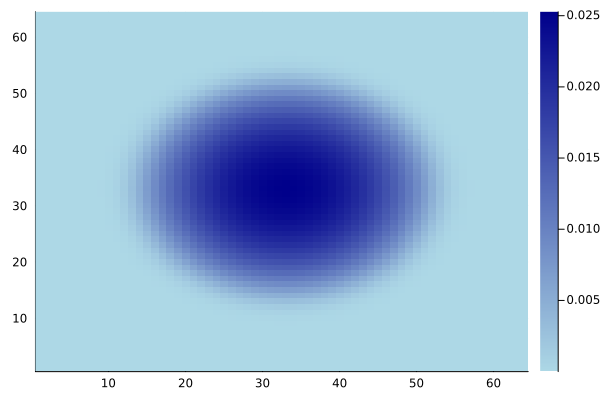

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)